In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

N = 1000
bootstrapN = 500

### Для биномиального $p(x) = c \cdot x^{3} \cdot I_{0.39 < x < 0.94}$  посчитаем $c$ из условия нормировки
### $\int_{0.39}^{0.94} cp(x) dx = c \cdot I = 1 \rightarrow c = {1\over I}$

In [195]:
from scipy.integrate import quad
I = quad(lambda x: x**3., a = .39, b = .94)[0]
c = 1./I

from scipy.stats import rv_continuous
class my_distr(rv_continuous):
    def _pdf(self, x):
        return c*(x**3.)
    

distr = my_distr(a = 0.39, b = 0.94, name = 'lal')
p = pDistr.rvs(size = 1)[0]
print 'p =',p
bin_noP = sts.binom(50, p)
bin_bigSample = bin_noP.rvs(size = N)

p = 0.876480915656


### Не знаем $E$, берем экспоненциальное с параметром 7.6

In [196]:
mean = sts.expon(scale = 1./7.6).rvs(size = 1)[0]
print "mean =", mean
norm_noE = sts.norm(mean, 2.1)
noE_bigSample = norm_noE.rvs(size = N)

mean = 0.0315352757721


### Для нормального, где не знаем $\sigma$, берем экспоненциальное с параметром 6.1

In [197]:
sigma = sts.expon(scale = 1./6.1).rvs(size = 1)[0]
print 'sigma =', sigma
norm_noD = sts.norm(3, sigma)
noD_bigSample = norm_noD.rvs(size = N)

sigma = 0.0400410178603


# эффективные оценки:
### для биномиального 
оценка $p: \theta^* = {\bar X}/M$, где M = 50
### для нормального (noE)
оценка $E: \theta^* = \bar X$
### для нормального (noD)
оценка $\sigma: \theta^* = \sum_1^{n} {{(X_{i}-a)^2} \over N}$, где a = 3

# Построим графики эффективных оценок:

In [ ]:
numbers = np.arange(1, N+1)
bootstrapNumbers = np.arange(1, bootstrapN+1)

Биномиальное

10.0 % done
20.0 % done
30.0 % done
40.0 % done
50.0 % done
60.0 % done
70.0 % done
80.0 % done
90.0 % done
100.0 % done
real p = 0.876480915656 , evaluated (mean 1..N) = 0.878882919435
(1000,) (1000,)


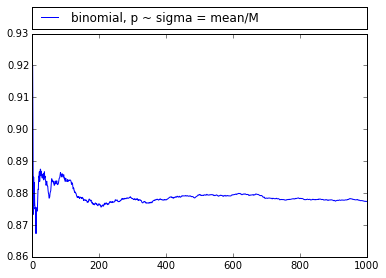

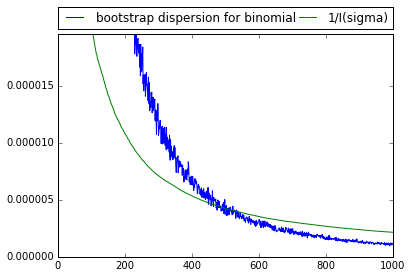

In [209]:
y = np.array([])
bsVariances = np.array([])
I = np.array([])
dispFisher = np.array([])

for n in numbers:
    sample = bin_bigSample[:n]
    eval = np.mean(sample)/50.
    distr = sts.binom(50, eval)
    bs = np.array([])
    for i in bootstrapNumbers:
        bs = np.append(bs, np.mean(distr.rvs(size = n))/50.)
    bsVariances = np.append(bsVariances, 
                            ((bs-bs.mean())**2.).sum()/n)
    y = np.append(y, eval)
    I = np.append(I, 50.*n/(eval*(1-eval)))
    if (n%100 == 0):
        print ((n*1.)/(N*1.))*100,'% done'
    
dispFisher = np.array(I)**(-1.)
    
# BINOMIAL
print 'real p =',p,', evaluated (mean 1..N) =',y.mean()

###
print numbers.shape, np.array(y).shape
###

plt.plot(numbers, y, label='binomial, p ~ sigma = mean/M')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),\
               loc=3, ncol=2, mode="expand", \
               borderaxespad=0.)
plt.show()

plt.plot(numbers, bsVariances, label='bootstrap dispersion for binomial')
plt.plot(numbers, dispFisher, label='1/I(sigma)')
plt.ylim(0,dispFisher.mean()*1.3)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),\
               loc=3, ncol=2, mode="expand", \
               borderaxespad=0.)
plt.show()


Нормальное, Е неизвестно

10.0 % done
20.0 % done
30.0 % done
40.0 % done
50.0 % done
60.0 % done
70.0 % done
80.0 % done
90.0 % done
100.0 % done
real E = 0.0315352757721 , evaluated (mean 1..N) = -0.0491994990169
(1000,) (1000,)


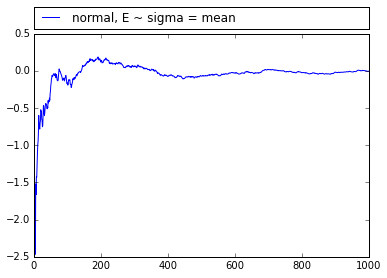

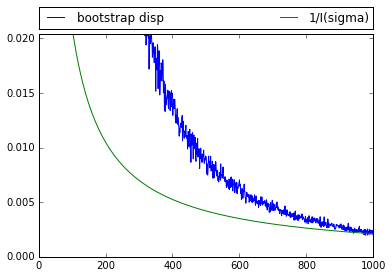

In [211]:
y = np.array([])
bsVariances = np.array([])
I = np.array([])
dispFisher = np.array([])

for n in numbers:
    sample = noE_bigSample[:n]
    eval = np.mean(sample)
    distr = sts.norm(eval, 2.1)
    bs = np.array([])
    for i in bootstrapNumbers:
        bs = np.append(bs, np.mean(distr.rvs(size = n)))
    bsVariances = np.append(bsVariances,
                            ((bs-bs.mean())**2.).sum()/n)
    y = np.append(y, eval)
    I = np.append(I, n/2.1)
    if (n%100 == 0):
        print ((n*1.)/(N*1.))*100,'% done'
    
dispFisher = np.array(I)**(-1.)

# NORMAL WITHOUT E
print 'real E =',mean,', evaluated (mean 1..N) =',y.mean()

###
print numbers.shape, np.array(y).shape
###

plt.plot(numbers, y, label='normal, E ~ sigma = mean')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),\
               loc=3, ncol=2, mode="expand", \
               borderaxespad=0.)
plt.show()

plt.plot(numbers, bsVariances, label='bootstrap disp')
plt.plot(numbers, dispFisher, label='1/I(sigma)') 
plt.ylim(0,dispFisher.mean()*1.3)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),\
               loc=3, ncol=2, mode="expand", \
               borderaxespad=0.)
plt.show()


Нормальное, $\sigma$ неизвестна

10.0 % done
20.0 % done
30.0 % done
40.0 % done
50.0 % done
60.0 % done
70.0 % done
80.0 % done
90.0 % done
100.0 % done
real D = 0.0400410178603 , evaluated (mean 1..N) = 0.00165761302942
(1000,) (1000,)


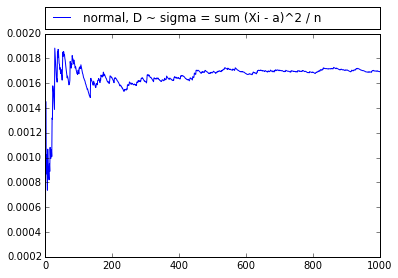

mean 1/I is 2.74177431443e-08


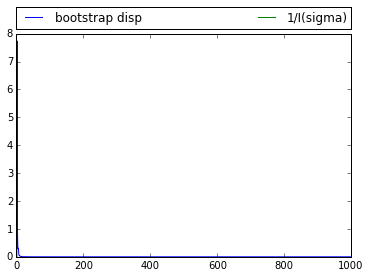

In [218]:
y = np.array([])
bsVariances = np.array([])
I = np.array([])
dispFisher = np.array([])

for n in numbers:
    sample = np.array(noD_bigSample[:n])
    eval = ((sample - 3)**2.).sum()/n
    distr = sts.binom(3, eval)
    bs = np.array([])
    for i in np.arange(1, bootstrapN):
        bs = np.append(bs, np.sum(np.array((distr.rvs(size = n) - 3))**2.)/n)
    bsVariances = np.append(bsVariances,
                            ((bs-bs.mean())**2.).sum()/n)
    y = np.append(y, eval)
    I = np.append(I, n/(2.*(eval**2.)))
    if (n%100 == 0):
        print ((n*1.)/(N*1.))*100,'% done'

dispFisher = np.array(I)**(-1.)

# NORMAL WITHOUT D
print 'real D =',sigma,', evaluated (mean 1..N) =',y.mean()

###
print numbers.shape, np.array(y).shape
###

plt.plot(numbers, y, label='normal, D ~ sigma = sum (Xi - a)^2 / n')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),\
               loc=3, ncol=2, mode="expand", \
               borderaxespad=0.)
plt.show()

plt.plot(numbers, bsVariances, label='bootstrap disp')
plt.plot(numbers, dispFisher, label='1/I(sigma)')
print 'mean 1/I is',dispFisher.mean()
# plt.ylim(0,dispFisher.mean()*1.3)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),\
               loc=3, ncol=2, mode="expand", \
               borderaxespad=0.)
plt.show()


дисперсия велика по сравнению с её оценкой 1/I, которая убывает со скоростью $\sigma ^4$, поэтому на графике ничего интересного